# 24.座標圧縮

### ABC213 C Dif:481
url : https://atcoder.jp/contests/abc213/tasks/abc213_c

### [概要]
ここからDifが400以上(茶色Dif)の問題。灰色コーダーの人は難しく感じるかもしれないが、理解できるまで解説をじっくり読んで頑張ろう。  
座標圧縮は応用範囲の広いテクニック。例えば制約が大きすぎてリストで処理するとMLE(メモリ制限超過)するというような場合に使う。まずはこの問題で座標圧縮は何か、どのように行うのかという基本の部分を覚えてほしい。

### [解説]
カードの行、列番号がそれぞれ小さい方から何番目なのかへ変換できればよい。
~例~
H W : 5 5
N : 5
A1 B1：1 1  
A2 B2：4 5  
A3 B3：1 2  
A4 B4：4 4  
A5 B5：5 5 
まず図を描く。自分で解く場合にも紙にペンで図を描いてみること。  
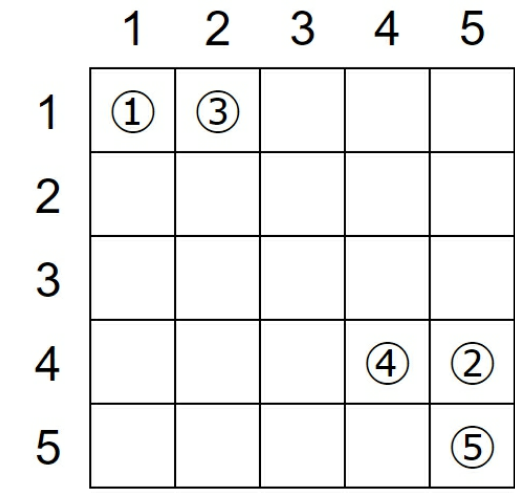  
行を消すと、  
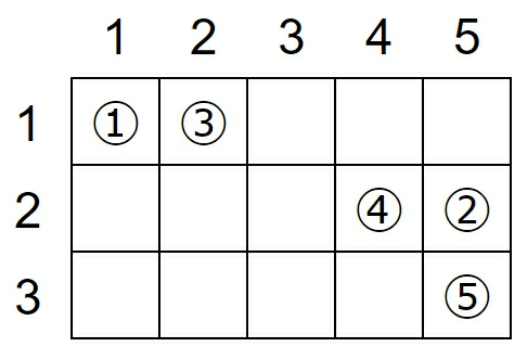  
行を消しても①~⑤まで列の番号はまったく変わっていないということがわかる。  
各カードについて行番号がどのように変化したか確認すると以下のようになる。  
①：1→1  
②：4→2  
③：1→1  
④：4→2  
⑤：5→3  
行番号はもともと[1,4,5]が存在し、それらが「小さい順から何番目にあるか」という情報に変換されたのがわかる。
1行目→1番目 4行目→2番目 5行目→3番目 ということ。  
行番号を受け取り、重複した番号を削除してソートすれば、ある行番号が小さい方から何番目にあるかということは容易に確認できる。  
列についても同様の操作を行い、行番号と列番号を変換して出力すればOK。  
重複した番号の削除はset、変換先の記録は連想配列を使用する。  
実装がわからない人は【実装のコツ】からそれぞれ<重複の除去><連想配列>を確認してほしい。  
このように「数列の要素」→「小さい順から何番目」と変換する方法を「座標圧縮」と呼ぶ。

### [実装のコツ]
- 受け取りを工夫する  
  入力を受け取る時、単に二次元配列へ[行,列]を格納するだけでは後の処理が面倒。[行,列]を受け取るリストと、行だけ、列だけ受け取るリストを別に用意すれば楽に実装できる。  
- 連想配列  
  本問の場合、「行番号」→「小さい順から何番目か」を変換するにはリストを使えば良さそうだがA,Bの最大値が大きすぎてMLE(メモリ制限超過)する。  
  例えばx→yと変換をしたい場合にconvertというリストを作って  
  convert[x]=y  
  と記録するならばxとしてありうる最大値分の長さを持つリストを作らねばならない。  
  A,Bの最大値は10^9で、長さ10^9のリストを作るとメモリが足りなくなる。  
  そこで「連想配列」を使う。 連想配列は別名「辞書」とも言い、「キー」と対応する「値」を登録できるデータ構造。 pythonには標準で搭載されており、importなども不要。  
  「使い方」  
  - 連想配列の作成: 変数名 =dict()
  - キー、値の登録、更新 [O(1)] : 変数名[キー]=値
  - ・値の参照【O(1)】：変数名[キー]
  「使用例」  
  下のセル参照  

  連想配列なら最大N個の(キー,値)の組み合わせを作るだけでよく、MLE(メモリ制限超過)しない。  
- for文で2つ以上の要素を取り出す
  cards=[[A1,B1],[A2,B2],...,[AN,BN]]
  となっている場合、以下のように書くことでAi,Biをgyou,retuへ順に格納しながら処理できる。
  ```
  for Gyou,Retu in cards:
  ```
  意味はした同じ。
  ```
  for i in range(N):
    Gyou=cards[i][0]
    Retu=cards[i][1]
  ```

In [1]:
#連想配列使用例
#連想配列の作成:変数名 =dict()
AsArray = dict()

#キー、値の登録、更新【O(1)】：変数名[キー]=値 
#キー、値ともに数値、文字列、タプルを入れることが可能
#ただしリストをキーにすることはできない
AsArray[1]=10
AsArray["Men"]="Taro"
AsArray[(1,2)]=[3,4,5]

#値の参照 [O(1)]:変数名[キー]
#※値が登録されていないキーにアクセスするとエラーとなる
print(AsArray[1])
print(AsArray["Men"])
print(AsArray[(1,2)])

10
Taro
[3, 4, 5]


In [13]:
#入力
H,W,N = map(int, input().split())
#iの書かれたカードを格納するリストの作成
i_cards = list()
for i in range(N):
    A,B = map(int, input().split())
    i_cards.append([A,B])
    
#カードがある行列を格納する集合を作る。
set_gyou = set()
set_retu = set()
for Gyou,Retu in i_cards:
    set_gyou.add(Gyou)
    set_retu.add(Retu)

#set処理した行列をリストに直してインデックスで取得できるようにする
list_gyou = list(set_gyou)
list_retu = list(set_retu)
#listをソートする
list_gyou.sort()
list_retu.sort()
#辞書型の作成
dic_gyou = dict()
dic_retu = dict()
#辞書型で集合の小さい順の数値に1,2...と数値を対応させていく。
for i in range(len(list_gyou)):
    dic_gyou[list_gyou[i]] = i+1
for i in range(len(list_retu)):
    dic_retu[list_retu[i]] = i+1

#辞書型を用いてカードの行列を圧縮後に変換
for Gyou,Retu in i_cards:
    print(dic_gyou[Gyou],dic_retu[Retu])





2 1
1 2


In [ ]:
#著者の入力例
# 入力の受け取り
H,W,N=map(int, input().split())

# カードの[行番号,列番号]を受け取るリスト
cards=[]
# 行番号だけ受け取るリスト
Gyou=[]
# 列番号だけ受け取るリスト
Retu=[]

# N回
for i in range(N):
    # 入力の受け取り
    A,B=map(int, input().split())
    # カードの[行番号,列番号]を受け取り
    cards.append([A,B])
    # 行番号を受け取り
    Gyou.append(A)
    # 列番号を受け取り
    Retu.append(B)

# 重複の削除(setにする)
Gyou=set(Gyou)
# リストに直す(setはソートできない)
Gyou=list(Gyou)
# ソートする
Gyou.sort()

# 変換先を記録する連想配列
GyouConvert=dict()

# 重複削除後の行の個数分
for i in range(len(Gyou)):
    # もとの行番号→インデックス番号+1と変換できるように記録(小さい方から何番目にあるか？)
    GyouConvert[Gyou[i]]=i+1

#列も同じことをする
Retu=set(Retu)
Retu=list(Retu)
Retu.sort()

RetuConvert=dict()

for i in range(len(Retu)):
    RetuConvert[Retu[i]]=i+1

# それぞれのカードについて行、列番号を変換して出力
for Gyou,Retu in cards:
    # 行番号の変換
    AnsGyou=GyouConvert[Gyou]
    # 列番号の変換
    AnsRetu=RetuConvert[Retu]
    # 答えを出力する
    print(AnsGyou,AnsRetu)
